In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'ninapro-db1-full-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2232669%2F3734425%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240205%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240205T192918Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D5fc7cd22feb0de9a22e1f187bb154787449fc3c843db22f2f36b86d8ad4e9af99d4d6b3024640d2eebfb8cffc3637856267e3d34f0d11284de39495748b69cab6f5e41b0c5e171e7e667fd6fa9a1bd64c69f133f7c34fe5f78096753463c391e788a4c5173308ad3add0d749c4723d9ad26f5c62b7ff52b361625ca24aa7db1defde65d17962d68d7ca7d358087c5774bfc2ba757d958776123f50c02bfd48638ceaebbfce0c94b751512080b10bf319c6910d18f78f7eb97aae5a894a0588780b5831421f8a19179acbc25679f7f18840f0a08ab074930dde9a1af04322c85aac8c5c7d5f6f20881c10a53929fc3d5b392b77b22306c1bdfeb5d33888ad7720'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 616546734 bytes downloaded
Downloaded and uncompressed: ninapro-db1-full-dataset
Data source import complete.


# Installing Dependencies

In [ ]:
!nvidia-smi

Tue Feb  6 07:19:48 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
# This get the RAPIDS-Colab install files and test check your GPU.  Run this and the next cell only.
# Please read the output of this cell.  If your Colab Instance is not RAPIDS compatible, it will warn you and give you remediation steps.
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/pip-install.py


Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 438, done.
remote: Counting objects: 100% (169/169), done.
remote: Compressing objects: 100% (115/115), done.
remote: Total 438 (delta 121), reused 57 (delta 54), pack-reused 269
Receiving objects: 100% (438/438), 118.31 KiB | 2.11 MiB/s, done.
Resolving deltas: 100% (223/223), done.
***********************************************************************
We will now install RAPIDS via pip! 
Please stand by, should be quick...
***********************************************************************

Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 955.2/955.2 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 GB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.8/142.8 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import cupy # linear algebra
import cudf as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from cuml.model_selection import train_test_split
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ninapro-db1-full-dataset/Ninapro_DB1.csv


# Preprocessing Dataset

In [4]:
df=pd.read_csv('/kaggle/input/ninapro-db1-full-dataset/Ninapro_DB1.csv')

In [5]:
df=df.iloc[:,11:-5]
df.head()

,glove_0,glove_1,glove_2,glove_3,glove_4,glove_5,glove_6,glove_7,glove_8,glove_9,...,glove_13,glove_14,glove_15,glove_16,glove_17,glove_18,glove_19,glove_20,glove_21,exercise
0,149.0,117.0,127.0,118.0,126.0,107.0,79.0,113.0,117.0,67.0,...,69.0,160.0,128.0,129.0,86.0,141.0,150.0,147.0,113.0,1
1,149.0,117.0,127.0,118.0,126.0,107.0,79.0,113.0,117.0,67.0,...,69.0,160.0,128.0,129.0,86.0,141.0,150.0,147.0,113.0,1
2,149.0,117.0,127.0,118.0,126.0,107.0,79.0,113.0,117.0,67.0,...,69.0,160.0,128.0,129.0,86.0,141.0,150.0,147.0,113.0,1
3,149.0,117.0,127.0,118.0,126.0,107.0,79.0,113.0,117.0,67.0,...,69.0,160.0,128.0,129.0,86.0,141.0,150.0,147.0,113.0,1
4,149.0,117.0,127.0,118.0,126.0,107.0,79.0,113.0,117.0,67.0,...,69.0,160.0,128.0,129.0,86.0,141.0,150.0,147.0,113.0,1


In [6]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [7]:
del df

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [9]:
from cuml.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Random Forest Classifier

In [ ]:
from cuml.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:188: UserWarning: To use pickling first train using float32 data to fit the estimator
  ret = func(*args, **kwargs)


RandomForestClassifier()

In [ ]:
y_pred = classifier.predict(X_test)

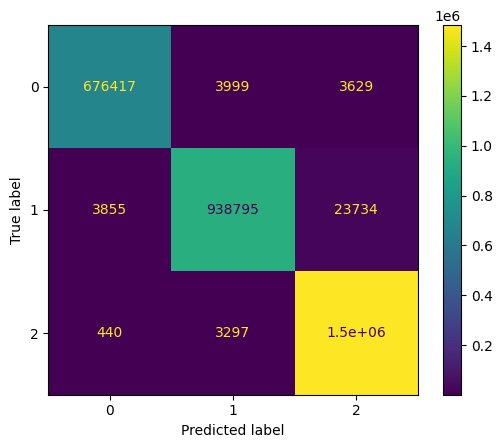

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test.get(), y_pred.get())
ConfusionMatrixDisplay(cm).plot()

In [ ]:
print("Test set classification rate: {}".format(cupy.mean(y_pred == y_test)))

Test set classification rate: 0.9875879508106354


# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()         # Very slow due to CPU processing
classifier.fit(X_train.get(), y_train.get())
y_pred = classifier.predict(X_test.get())

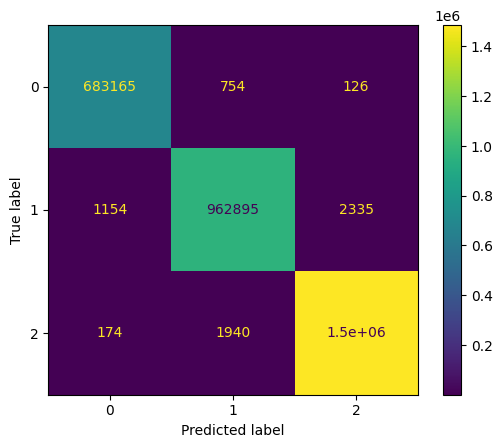

In [ ]:
cm = confusion_matrix(y_test.get(), y_pred)
ConfusionMatrixDisplay(cm).plot()

In [ ]:
print("Test set classification rate: {}".format(cupy.mean(y_pred == y_test.get())))

Test set classification rate: 0.9979342990477319


# Logistic Regression

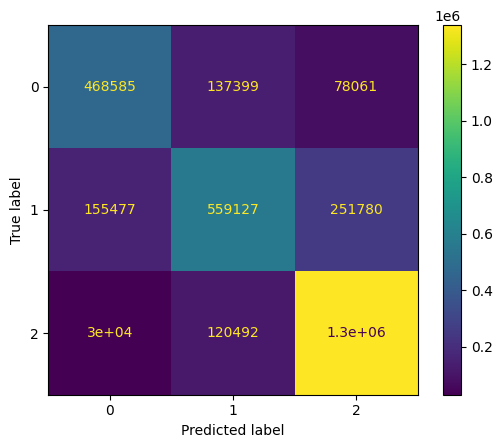

In [ ]:
from cuml import LogisticRegression
from cuml.multiclass import MulticlassClassifier
classifier = MulticlassClassifier(LogisticRegression())
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test.get(), y_pred.get())
ConfusionMatrixDisplay(cm).plot()

In [ ]:
print("Test set classification rate: {}".format(cupy.mean(y_pred == y_test)))

Test set classification rate: 0.7537667258687701


# K Nearest Neighbors

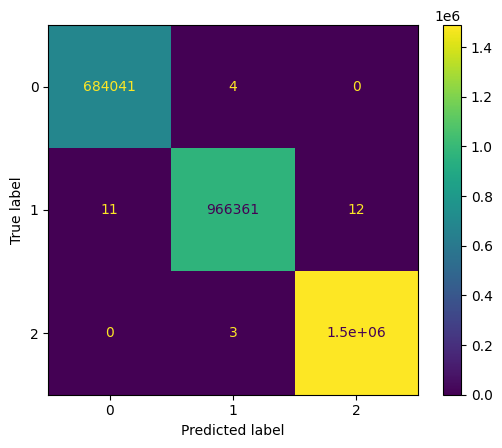

In [10]:
from cuml.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test.get(), y_pred.get())
ConfusionMatrixDisplay(cm).plot()

In [11]:
print("Test set classification rate: {}".format(cupy.mean(y_pred == y_test)))

Test set classification rate: 0.9999904409951307
